Ana Carolina Delena Cury
 - Collaborator 1
 - Collaborator 2
 - etc

In [4]:
pwd

'c:\\Users\\delen\\Downloads'

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.model_selection as skms
import sklearn.linear_model as sklm

import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [55]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = skd.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Create and fit the model 
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

R2_train = LR_model.score(X_train, y_train)
R2_test = LR_model.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [68]:
print("Model Parameters: ", LR_model.__dict__)
print("True Coefficients: ", coef)
print(f"MSE (Train): {MSE_train}")
print(f"MSE (Test): {MSE_test}")
print(f"R2 (Train): {R2_train}")
print(f"R2 (Test): {R2_test}")

Model Parameters:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 5, 'coef_': array([21.52476416, 21.0447652 , 95.89526884,  6.65896819, 49.20515152]), 'rank_': 5, 'singular_': array([17.14087565, 16.37959118, 15.55438107, 14.33062407, 13.89550251]), 'intercept_': -6.884670944255215}
True Coefficients:  [21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]
MSE (Train): 98.397195366604
MSE (Test): 85.50162291627638
R2 (Train): 0.9928262025191834
R2 (Test): 0.99285183178066


In [69]:
print(coef)

[21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]


#### Your written answers here

What are your model parameters?
 - True Coefficients:  [21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]. Intercept : -6.884670944255215

What were your MSE and R^2?
 - MSE (Train): 98.397195366604
MSE (Test): 85.50162291627638
R2 (Train): 0.9928262025191834
R2 (Test): 0.99285183178066



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets

np.random.seed(15)
bias = 50 * np.random.randn()

X, y, coef = datasets.make_regression(
    n_samples=300,
    n_features=9,  # n_features = 10 --> simple linear regression
    noise=3,
    bias=bias,
    n_informative=6,
    effective_rank=6,
    random_state=15,
    shuffle=False,  # samples will be in order
    coef=True,
)

Xa = (0.6 * X[:, 2] + 0.4 * X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data=X, columns=column_names)
reg2_df['y'] = y


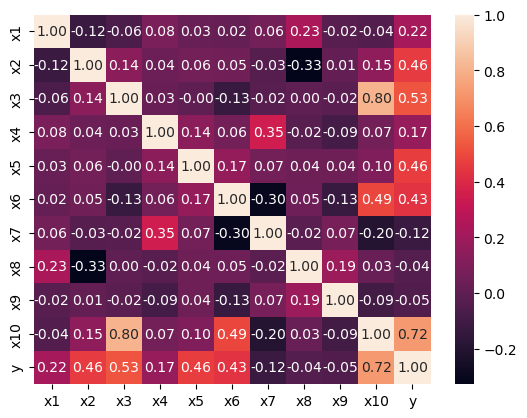

In [7]:
corr = reg2_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

candidate_idx = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) - 1
Z = reg2_df.iloc[:, candidate_idx].values
Z_names = [reg2_df.columns[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, reg2_df['y'], test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

print(f'R2 train {R2_train:.2f}\nR2 test {R2_test:.2f}')



R2 train 0.87
R2 test 0.89


In [9]:
print()

#### Your written answers here

What are your model parameters?
 - 

Which features (x1, x2...) were significant? Which were co-linear?
 - x10 (0.72) → Strong positive correlation with y. x10 and x3 (0.80) → Highly collinear.
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [27]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True)
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [28]:
X = housing_df[['sqft_living', 'grade', 'sqft_above']]
y = housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

y_pred = model_linreg.predict(X_scaled_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2:.2f}')

R^2: 0.54


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [32]:
# Your code here. Add cells as needed.

housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True)
housing_df.head()

X, y, coef= skd.make_regression(n_samples=housing_df.shape[0],
                                n_features=housing_df.shape[1]-1,
                                noise=0.1,
                                bias=0,
                                random_state=15,
                                shuffle=False,
                                coef=True)


# Optionally, build a new DataFrame with the generated features and target
new_feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
synthetic_df = pd.DataFrame(X, columns=new_feature_names)
synthetic_df["synthetic_price"] = y

synthetic_df.head()

print_model(0, coef, new_feature_names, model_name = 'True Model')



True Model:
 y = + 11.34*feature_1 + 35.08*feature_2 + 44.67*feature_3 + 10.01*feature_4 + 18.55*feature_5 + 82.61*feature_6 + 35.03*feature_7 + 16.15*feature_8 + 52.67*feature_9 + 48.73*feature_10


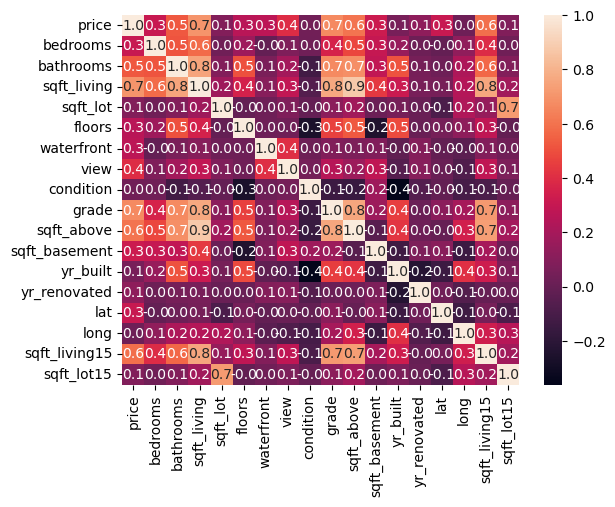

In [12]:
corr = housing_df.corr()
sns.heatmap(corr, annot = True, fmt = '.1f')
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - Sqft_living, grade, Sqft_above. 
 Sqft_living : Larger homes tend to be priced higher. 
 Grade : Homes with higher grades are often more expensive due to better construction and aesthetics.
 Sqft_above : Homes with more above-ground square footage are generally more desirable and pricier.


### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [13]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

y_pred = model_linreg.predict(X_scaled_test)
r2 = r2_score(y_test, y_pred)

r2

0.5547210587725273

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [20]:
# y = housing_df[['price']]
X = housing_df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ss= StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

#fill in the code
model_lasso = Lasso(alpha=10000)
model_lasso.fit(X_scaled_train, y_train)

R2 = model_lasso.score(X_scaled_test, y_test)

R2

0.6735917164391003

In [23]:
# Get the coefficients of the Lasso model
lasso_coefficients = model_lasso.coef_

top_3_indices = np.argsort(np.abs(lasso_coefficients))[-3:]
top_3_features = [X.columns[i] for i in top_3_indices]

print("Top 3 features with the largest absolute value coefficients:")
for feature, coef in zip(top_3_features, lasso_coefficients[top_3_indices]):
    print(f"{feature}: {coef}")

Top 3 features with the largest absolute value coefficients:
lat: 71767.41052293024
grade: 118331.6201866633
sqft_living: 139429.21962104132


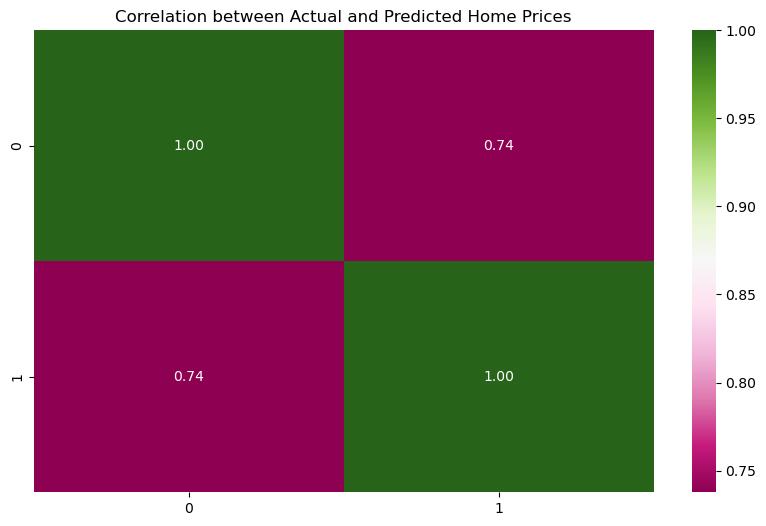

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(np.corrcoef(y_test, y_pred), annot=True, fmt='.2f', cmap='PiYG')
plt.title('Correlation between Actual and Predicted Home Prices')
plt.show()

### Your written answers here
Which regression did you use?
 - Lasso Regression

Does your regularized model look better than your MLR? How so?
 - Lasso Regression looks better, since the R2 is bigger, indicating better performance. Also, Lasso model might help reduce overfitting. 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [30]:
# Split the data into homes below and above $1M sale price
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

print("Homes below $1M:")
print(below_1M.head())

print("\nHomes above $1M:")
print(above_1M.head())

Homes below $1M:
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_l

In [49]:
def fit_lasso_model(df, alpha=10000):
    X = df.drop(columns=['price'])
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    ss = StandardScaler()
    X_scaled_train = ss.fit_transform(X_train)
    X_scaled_test = ss.transform(X_test)
    
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_scaled_train, y_train)
    
    y_pred = model_lasso.predict(X_scaled_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f'R^2 for Lasso model with alpha={alpha}: {r2:.2f}')
    return y_test, y_pred

# Fit Lasso model to homes below $1M
print("Homes below $1M:")
y_test_below_1M, y_pred_below_1M = fit_lasso_model(below_1M)

# Fit Lasso model to homes above $1M
print("\nHomes above $1M:")
y_test_above_1M, y_pred_above_1M = fit_lasso_model(above_1M)

# Fit Ridge model to homes below $1M
print("Homes below $1M:")
y_test_below_1M, y_pred_below_1M = fit_ridge_model(below_1M)

# Fit Ridge model to homes above $1M
print("\nHomes above $1M:")
y_test_above_1M, y_pred_above_1M = fit_ridge_model(above_1M)

Homes below $1M:
R^2 for Lasso model with alpha=10000: 0.66

Homes above $1M:
R^2 for Lasso model with alpha=10000: 0.54
Homes below $1M:
R^2 for Ridge model with alpha=10000: 0.63

Homes above $1M:
R^2 for Ridge model with alpha=10000: 0.15


 ### Your written answers here

 What are the $R^2$ for the two models?

Home below $1M: 
R2 for Lasso = 0.66
R2 for Ridge = 0.63

Home above $1M 
R2 for Lasso = 0.54
R2 for Lasso = 0.15

 


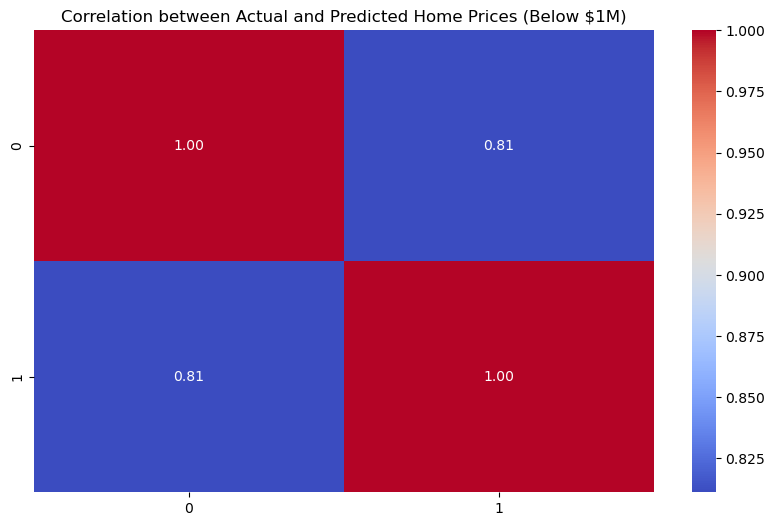

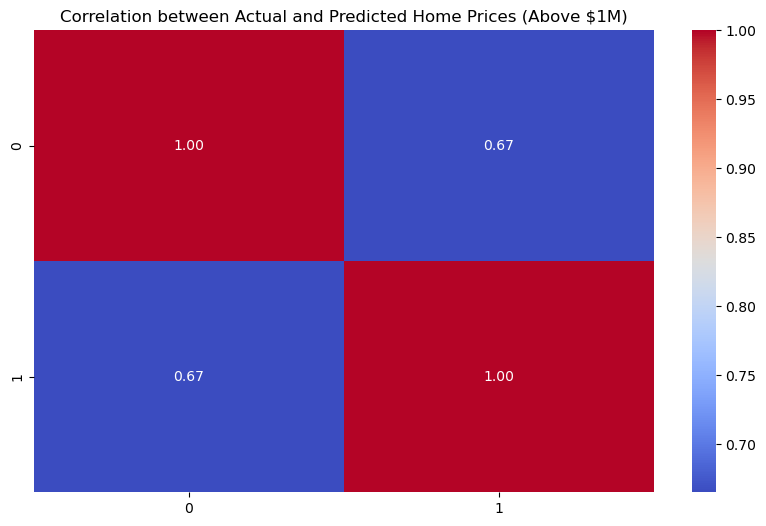

In [ ]:
# Plot correlation map for homes below $1M
plt.figure(figsize=(10, 6))
sns.heatmap(np.corrcoef(y_test_below_1M, y_pred_below_1M), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Actual and Predicted Home Prices (Below $1M)')
plt.show()

# Plot correlation map for homes above $1M
plt.figure(figsize=(10, 6))
sns.heatmap(np.corrcoef(y_test_above_1M, y_pred_above_1M), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Actual and Predicted Home Prices (Above $1M)')
